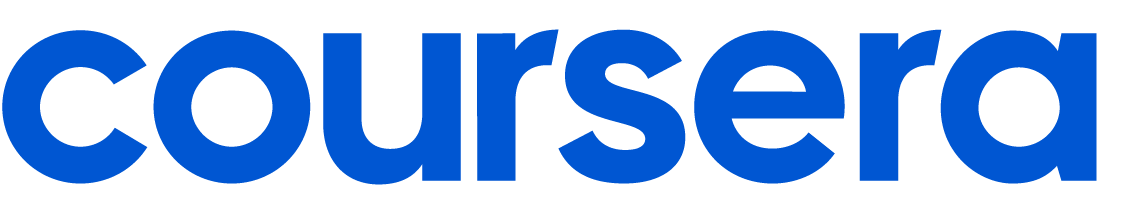

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [2]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(10)

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Mailed check,Yes,Both,No,Mobile,21.678290,...,35,Comedy,3.721134,8,Female,2,Yes,Yes,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Bank transfer,No,Both,No,Computer,36.512761,...,28,Action,4.090868,9,Female,20,No,Yes,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,Electronic check,Yes,TV Shows,No,TV,16.355816,...,10,Fantasy,3.410221,2,Female,22,No,No,2LDC9AQ3C5,0
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,74DURHL3Y8,1
9,14,18.842934,263.801080,Standard,Bank transfer,No,Movies,No,Computer,38.560694,...,0,Comedy,2.993441,0,Male,18,No,No,CY8S2R3A1T,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

## Data exploration

In [5]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [18]:
train_df['Churn'].value_counts()


0    199605
1     44182
Name: Churn, dtype: int64

## Data cleaning and analysis

## Missing values found = 0

In [ ]:

train_df.isnull().sum()


## Duplicates found = 0

In [19]:
train_df.duplicated().sum()
#no duplicates found

0

## Outliers found = 741
### Outlier Analysis of Numerical Variables

After exploring all numerical variables for outliers, I found that **only the `TotalCharges` column exhibits outliers (741 instances above the upper bound)**. I wanted to verify whether these outliers are genuine high values or merely data errors.

1. **Investigation:**
   - **Account Age Analysis:** We checked the `AccountAge` of these outliers and discovered that they belong to very old accounts. However, many old accounts do not have such high charges.
   - **Subscription Plan Analysis:** We examined the subscription plans of these outlier accounts and found that the plans are distributed equally. This indicates that the outliers are not linked to any specific subscription type.

2. **Conclusion:**
   Given the equal distribution of subscription plans, the high values in `TotalCharges` likely reflect **genuine extreme values** rather than data entry errors. However, their presence can distort the analysis and potentially degrade model performance.

3. **Next Steps:**
   - **Experiment:** Train models using three different versions of the `TotalCharges` feature:
     - **Original TotalCharges.**
     - **Log-transformed TotalCharges** (to reduce skewness).
     - **Winsorized TotalCharges** (capping extreme values at a certain percentile).
   - **Evaluation:** Compare the models' performance using metrics such as ROC AUC and accuracy to decide which preprocessing method best suits the data and improves model performance.


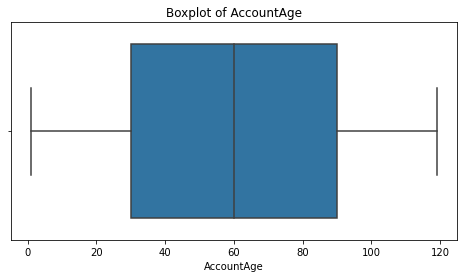

Number of outliers in AccountAge: 0


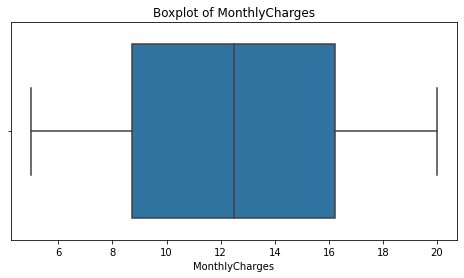

Number of outliers in MonthlyCharges: 0


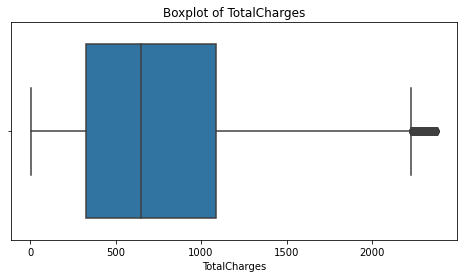

Number of outliers in TotalCharges: 741


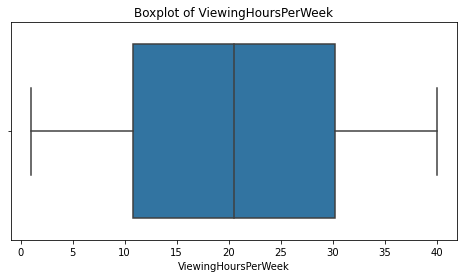

Number of outliers in ViewingHoursPerWeek: 0


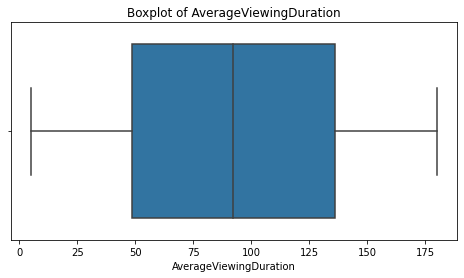

Number of outliers in AverageViewingDuration: 0


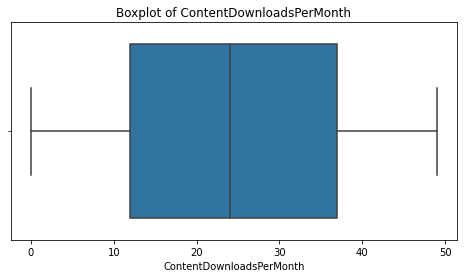

Number of outliers in ContentDownloadsPerMonth: 0


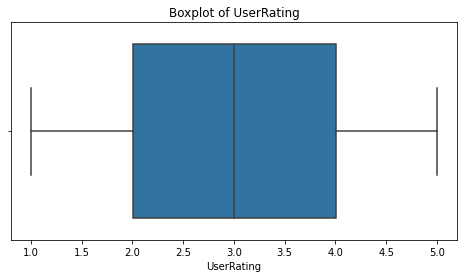

Number of outliers in UserRating: 0


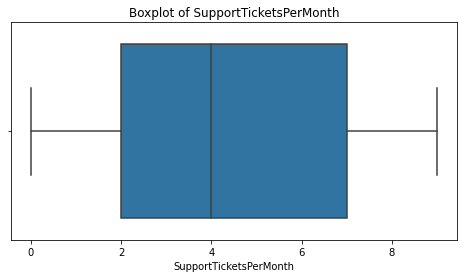

Number of outliers in SupportTicketsPerMonth: 0


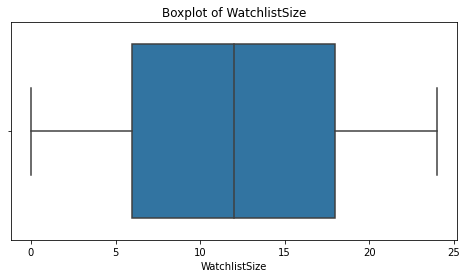

Number of outliers in WatchlistSize: 0


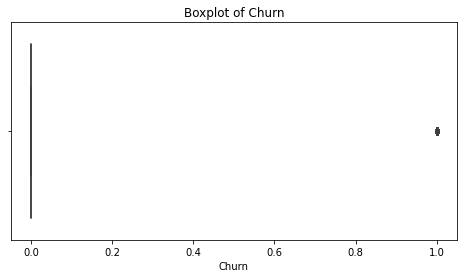

Number of outliers in Churn: 44182


In [20]:
# Identify all numerical columns (int and float types)
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for col in numerical_cols:
    # Plot a boxplot for the column
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
    
    # Calculate the first and third quartiles and the interquartile range (IQR)
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries using the IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers in the current column
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {outliers.shape[0]}")

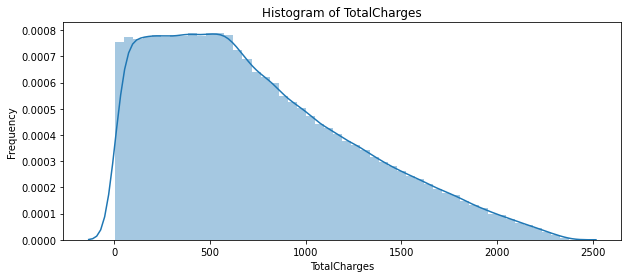

In [8]:


plt.figure(figsize=(10, 4))
sns.distplot(train_df['TotalCharges'], bins=50, kde=True)
plt.title('Histogram of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()



Descriptive stats for AccountAge in outliers:
count    741.000000
mean     116.905533
std        1.856831
min      112.000000
25%      116.000000
50%      117.000000
75%      119.000000
max      119.000000
Name: AccountAge, dtype: float64
Descriptive stats for AccountAge in all data:
count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64


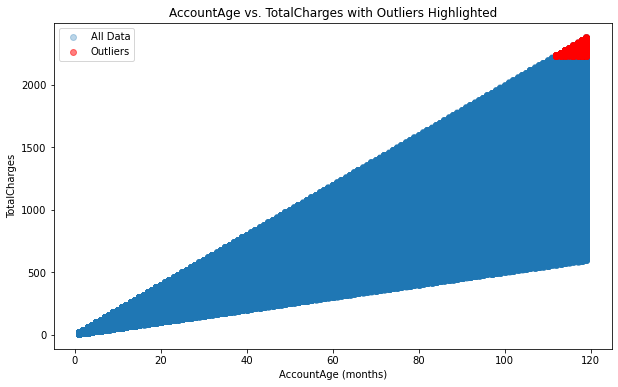

In [40]:
# Step 3: Check the descriptive statistics for AccountAge in the outliers
print("Descriptive stats for AccountAge in outliers:")
print(outliers['AccountAge'].describe())

# Also, compare with overall AccountAge distribution
print("Descriptive stats for AccountAge in all data:")
print(train_df['AccountAge'].describe())

# Step 4: Visualize the relationship between AccountAge and TotalCharges
plt.figure(figsize=(10, 6))
plt.scatter(train_df['AccountAge'], train_df['TotalCharges'], alpha=0.3, label="All Data")
plt.scatter(outliers['AccountAge'], outliers['TotalCharges'], color='red', alpha=0.5, label="Outliers")
plt.xlabel('AccountAge (months)')
plt.ylabel('TotalCharges')
plt.title('AccountAge vs. TotalCharges with Outliers Highlighted')
plt.legend()
plt.show()

In [9]:
# Group the outliers by SubscriptionType and get counts
outlier_subscription_counts = outliers['SubscriptionType'].value_counts()
print("Subscription plans for outliers:\n", outlier_subscription_counts)

# Calculate percentages for better comparison
outlier_subscription_percent = outliers['SubscriptionType'].value_counts(normalize=True) * 100
print("\nSubscription plan percentages for outliers:\n", outlier_subscription_percent)


Subscription plans for outliers:
 Basic       15928
Standard    15099
Premium     13155
Name: SubscriptionType, dtype: int64

Subscription plan percentages for outliers:
 Basic       36.050880
Standard    34.174551
Premium     29.774569
Name: SubscriptionType, dtype: float64


### Categorical Data Consistency Check

After reviewing the unique values for all object (categorical) columns in the dataset, I found that the data is consistent. Each string is formatted with the first letter capitalized followed by all lower case letters (e.g., "Yes", "No", "Premium"). Because of this consistent formatting, no additional case normalization (such as converting all text to lower case) is necessary for this analysis but is a good practice to do if new data is being added or data is being compiled from different sources to ensure uniformity of data.


In [10]:
# Identify all columns with dtype 'object'
object_columns = train_df.select_dtypes(include=['object']).columns

# Loop through each object column to print unique values before and after cleaning
for col in object_columns:
    print(f"Before cleaning - {col} unique values:")
    print(train_df[col].unique())
    print("\n")
    
    


Before cleaning - SubscriptionType unique values:
['Premium' 'Basic' 'Standard']


Before cleaning - PaymentMethod unique values:
['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']


Before cleaning - PaperlessBilling unique values:
['No' 'Yes']


Before cleaning - ContentType unique values:
['Both' 'Movies' 'TV Shows']


Before cleaning - MultiDeviceAccess unique values:
['No' 'Yes']


Before cleaning - DeviceRegistered unique values:
['Mobile' 'Tablet' 'Computer' 'TV']


Before cleaning - GenrePreference unique values:
['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']


Before cleaning - Gender unique values:
['Male' 'Female']


Before cleaning - ParentalControl unique values:
['No' 'Yes']


Before cleaning - SubtitlesEnabled unique values:
['No' 'Yes']


Before cleaning - CustomerID unique values:
['CB6SXPNVZA' 'S7R2G87O09' 'EASDC20BDT' ... '0H3SWWI7IU' '63SJ44RT4A'
 'A6IN701VRY']





## Key Findings from EDA  
### - Churn rate: **18%**  
### Strongest churn predictor: `AccountAge` (negative correlation).  
### High `TotalCharges` outliers are genuine (old accounts).  
### Data analysis Insights
#### Univariate Analysis
- **Numerical Features:**  
  - Most numerical variables appear to be normally distributed, except for `TotalCharges`, which is right-skewed. This skewness is likely driven by outliers.
- **Categorical Features:**  
  - The frequency counts show that categorical variables are relatively evenly distributed, and their values are consistent (e.g., properly capitalized).

#### Bivariate/Multivariate Analysis
- **Correlation Analysis:**  
  - The correlation matrix indicates that about 90% of the numerical features have near-zero correlations with each other.
  - Notably, `TotalCharges` has a moderate correlation with `MonthlyCharges` (0.5) and a strong correlation with `AccountAge` (0.82).
  - Correlations with the target variable `Churn` are generally weak:  
    - `AccountAge`: -0.2  
    - `MonthlyCharges`: 0.1  
    - `TotalCharges`: -0.12  
    - `ViewingHoursPerWeek`: -0.13  
    - `AverageViewingDuration`: -0.15  
    - `ContentDownloadsPerMonth`: -0.13  
    - `SupportTicketsPerMonth`: 0.08
- **Scatter and Pair Plots:**  
  - Overall, scatter plots and pair plots did not reveal strong additional relationships beyond those seen in the correlation matrix.
- **Group Comparisons (Violin Plots):**  
  - **TotalCharges:**  
    - For churned customers (`Churn = 1`), the distribution is more spread out at lower TotalCharges, while both churned and non-churned groups form a similar tail as charges increase.
  - **MonthlyCharges:**  
    - Non-churned customers (`Churn = 0`) display an even spread of monthly charges, whereas churned customers (`Churn = 1`) show a pronounced tail at lower monthly charges that becomes more dispersed as charges increase.

#### Next Steps
Based on these insights, the next steps in our analysis will include:
- **Experimentation with Feature Transformations:**  
  - For `TotalCharges`, we will experiment with the original feature, a log-transformed version, and a winsorized version to address the skewness and reduce the influence of extreme values.
- **Model Evaluation:**  
  - We will train models using these different versions of `TotalCharges` and compare performance metrics (e.g., ROC AUC, accuracy) to determine the most effective preprocessing approach.


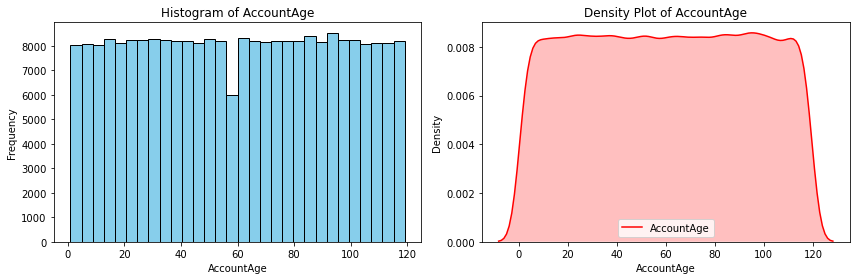

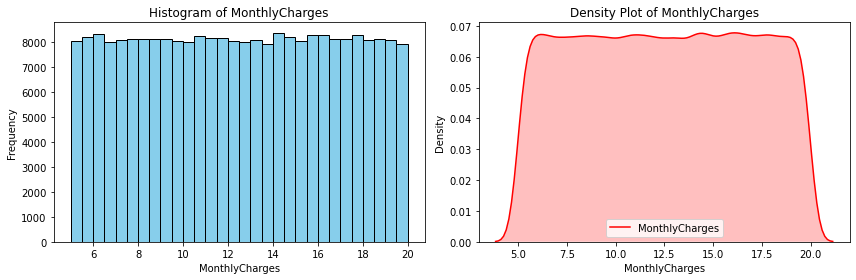

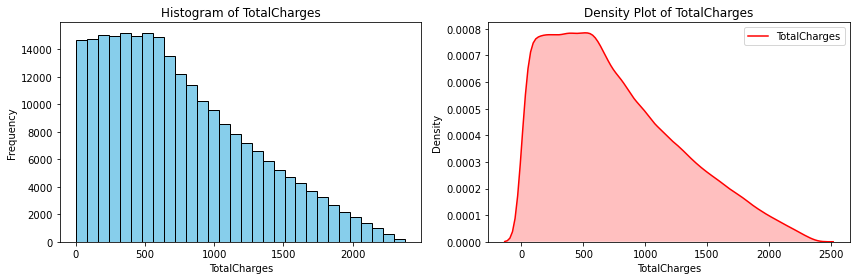

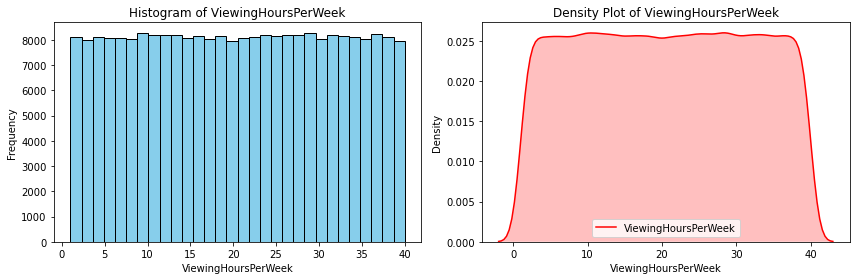

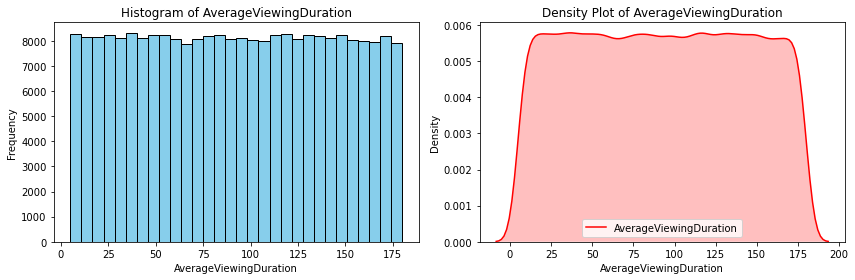

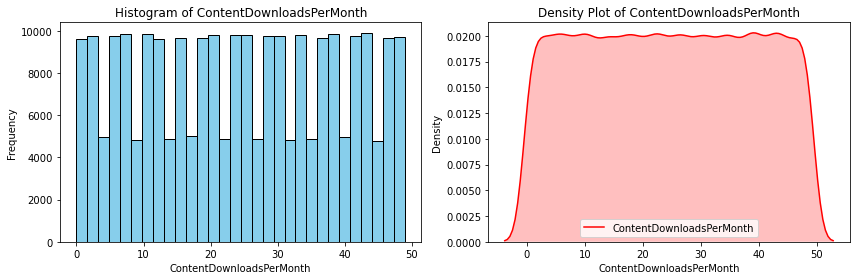

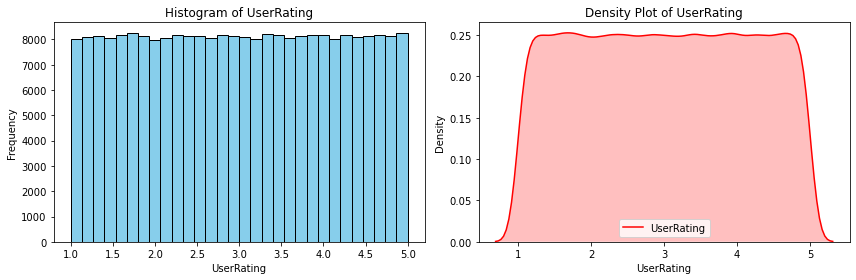

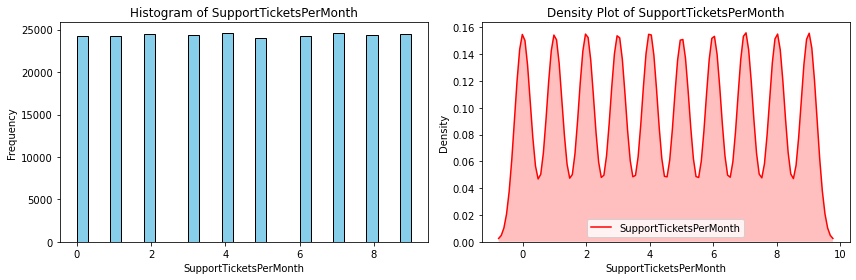

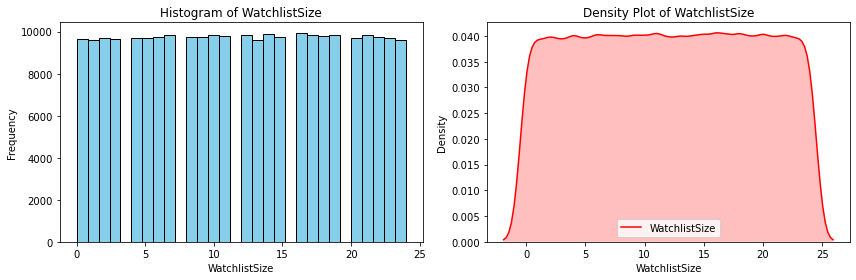

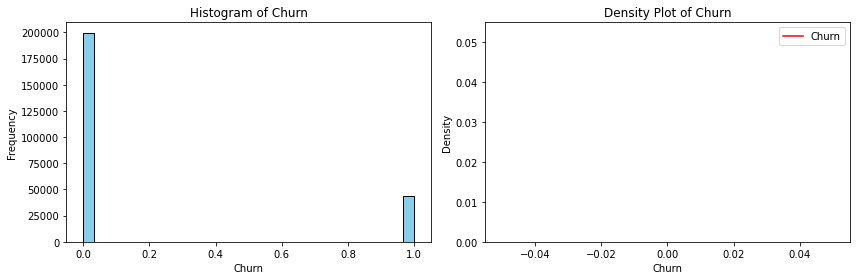

Frequency counts for SubscriptionType:
Standard    81920
Basic       81050
Premium     80817
Name: SubscriptionType, dtype: int64




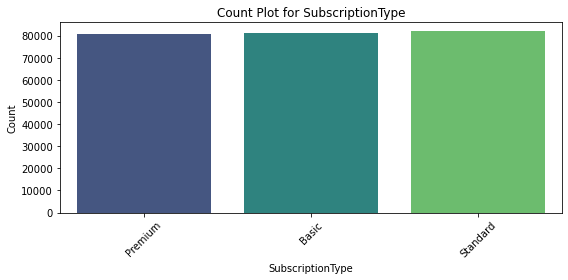

Frequency counts for PaymentMethod:
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: PaymentMethod, dtype: int64




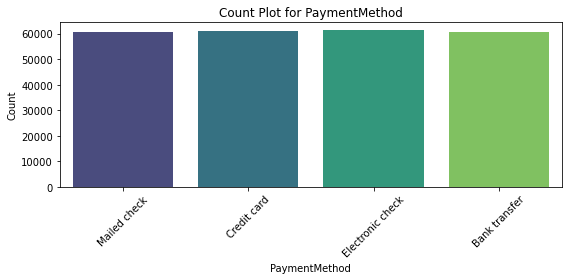

Frequency counts for PaperlessBilling:
No     121980
Yes    121807
Name: PaperlessBilling, dtype: int64




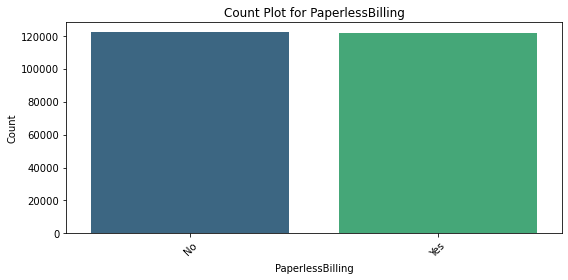

Frequency counts for ContentType:
Both        81737
TV Shows    81145
Movies      80905
Name: ContentType, dtype: int64




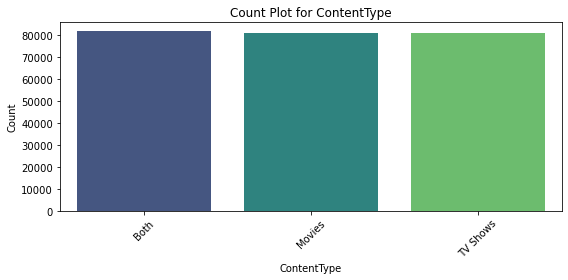

Frequency counts for MultiDeviceAccess:
No     122035
Yes    121752
Name: MultiDeviceAccess, dtype: int64




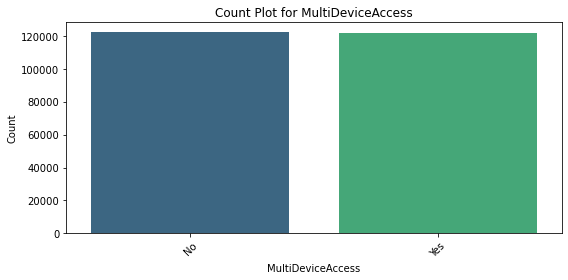

Frequency counts for DeviceRegistered:
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: DeviceRegistered, dtype: int64




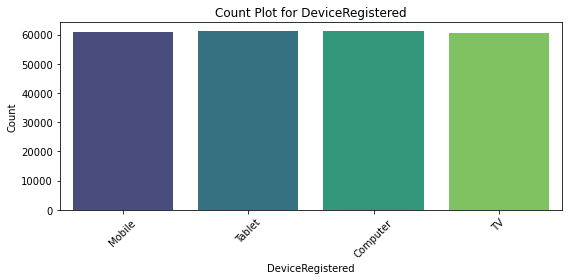

Frequency counts for GenrePreference:
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: GenrePreference, dtype: int64




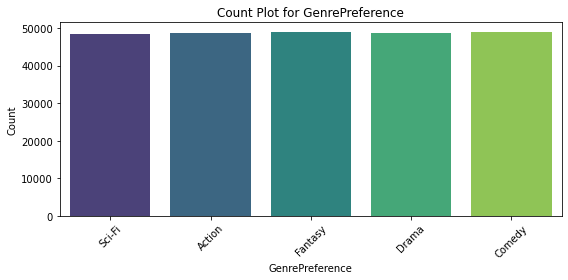

Frequency counts for Gender:
Female    121930
Male      121857
Name: Gender, dtype: int64




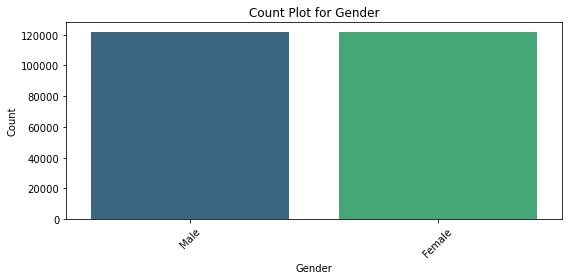

Frequency counts for ParentalControl:
Yes    122085
No     121702
Name: ParentalControl, dtype: int64




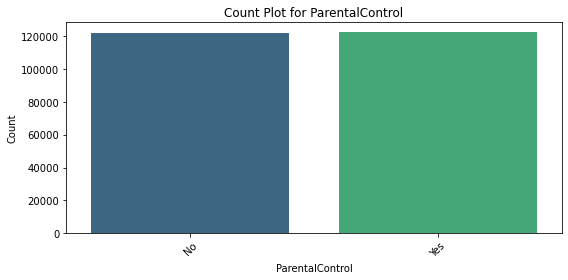

Frequency counts for SubtitlesEnabled:
Yes    122180
No     121607
Name: SubtitlesEnabled, dtype: int64




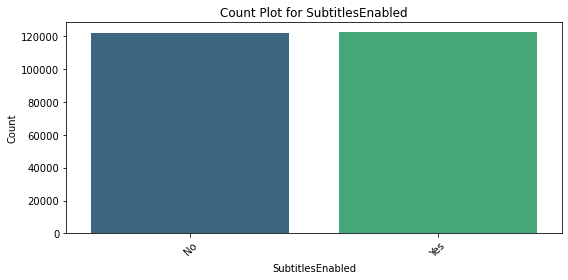

Frequency counts for CustomerID:
35JFKOEEF2    1
S1MAY3QMG2    1
A9F6JL53DQ    1
QIU0RB9W0M    1
TEDUG64P9L    1
             ..
SSE3I02A5V    1
CS3313GP73    1
PAR1V4BM5F    1
S5XZWJUHHY    1
N7LKS5ZZ4P    1
Name: CustomerID, Length: 243787, dtype: int64




In [ ]:


# -----------------------------------------------
# Univariate Analysis (Numerical Features)
# -----------------------------------------------

# Get numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram using plt.hist (since sns.histplot isn't available)
    plt.subplot(1, 2, 1)
    plt.hist(train_df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Density Plot using sns.kdeplot
    plt.subplot(1, 2, 2)
    sns.kdeplot(train_df[col], shade=True, color='red')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

# -----------------------------------------------
# Univariate Analysis (Categorical Features)
# -----------------------------------------------

# Get categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Frequency counts for {col}:")
    print(train_df[col].value_counts())
    print("\n")
    
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train_df, palette='viridis')
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



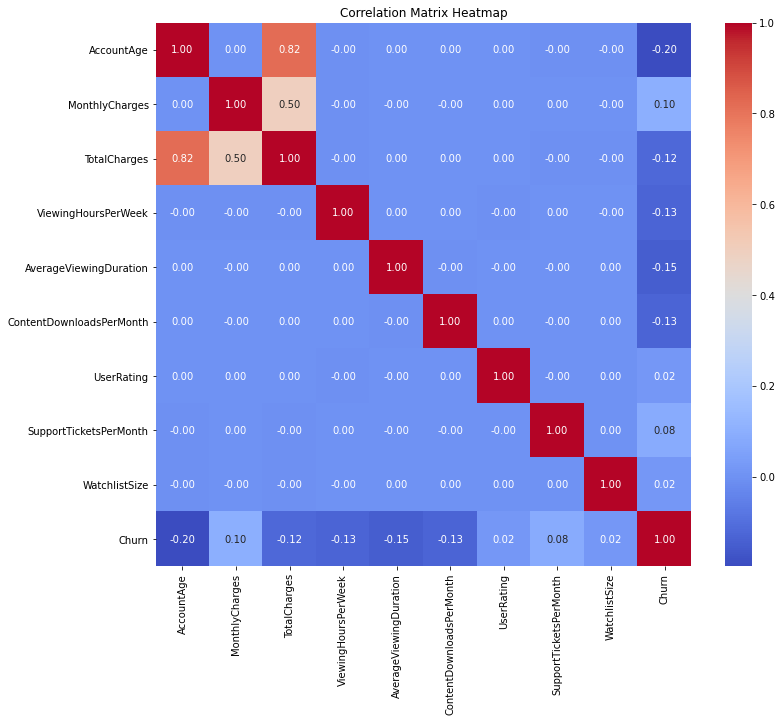

In [6]:
# -----------------------------------------------
# Bivariate / Multivariate Analysis
# -----------------------------------------------

# 1. Correlation Analysis: Correlation Matrix and Heatmap
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



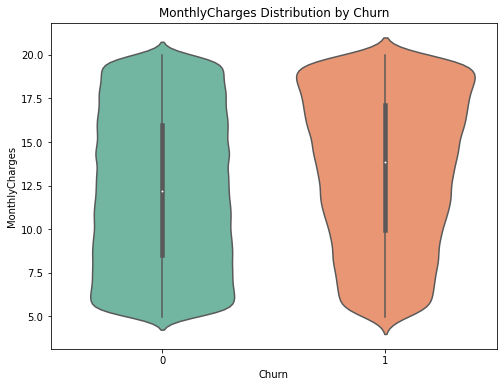

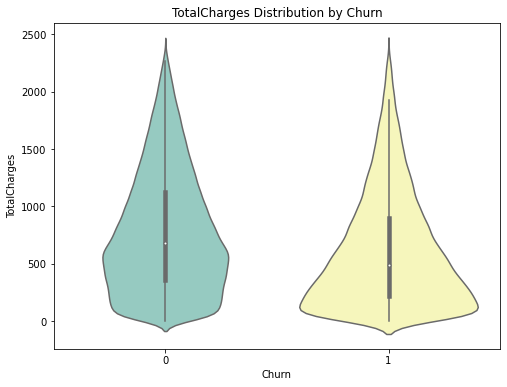

In [7]:
# 3. Group Comparisons: Compare groups (e.g., Churn vs. non-churn)
if 'Churn' in train_df.columns:
    # Violin Plot for MonthlyCharges by Churn
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Churn', y='MonthlyCharges', data=train_df, palette='Set2')
    plt.title('MonthlyCharges Distribution by Churn')
    plt.xlabel('Churn')
    plt.ylabel('MonthlyCharges')
    plt.show()
    
    # Violin Plot for TotalCharges by Churn
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Churn', y='TotalCharges', data=train_df, palette='Set3')
    plt.title('TotalCharges Distribution by Churn')
    plt.xlabel('Churn')
    plt.ylabel('TotalCharges')
    plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric and categorical columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

# Remove identifier columns and the target from numeric analysis
if 'CustomerID' in numeric_cols:
    numeric_cols.remove('CustomerID')
if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']
Categorical columns: ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']



Descriptive statistics for 'AccountAge' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,63.273290,33.953685,1.0,35.0,65.0,93.0,119.0
1,44182.0,45.674121,32.001262,1.0,18.0,40.0,69.0,119.0


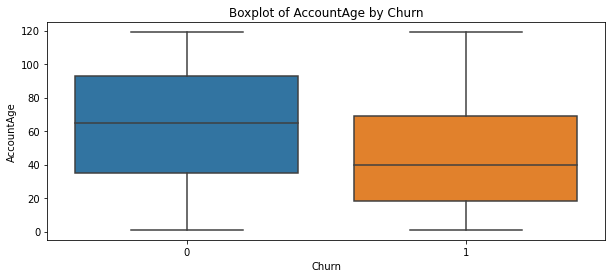

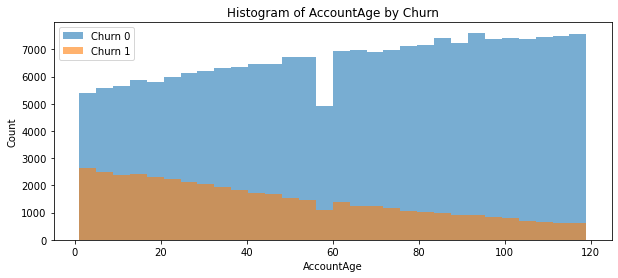


Descriptive statistics for 'MonthlyCharges' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,12.286129,4.317675,4.990062,8.532456,12.189954,15.993218,19.989957
1,44182.0,13.414880,4.251322,4.990112,9.963733,13.855745,17.132808,19.989741


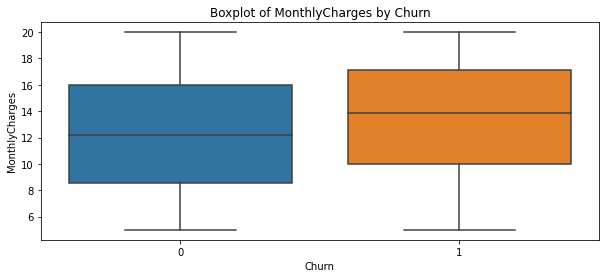

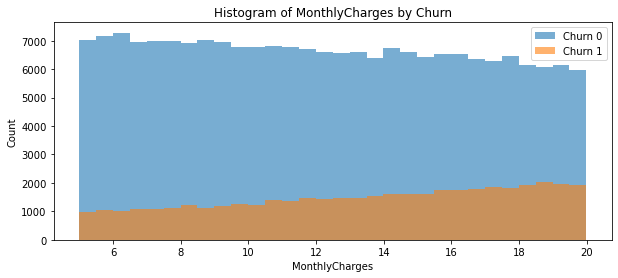


Descriptive statistics for 'TotalCharges' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,780.402245,524.200292,4.999861,362.799813,684.445761,1124.699587,2378.723844
1,44182.0,616.737816,496.333924,4.991154,218.502198,488.927265,903.552235,2356.614662


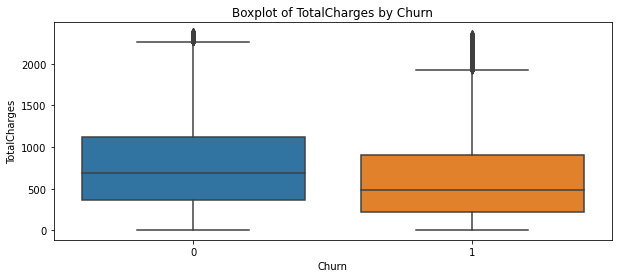

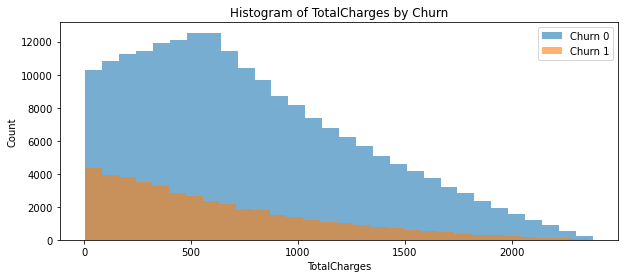


Descriptive statistics for 'ViewingHoursPerWeek' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,21.182697,11.198072,1.000133,11.601957,21.545178,30.931229,39.999723
1,44182.0,17.427741,10.932147,1.000065,7.898715,16.079108,26.218169,39.997750


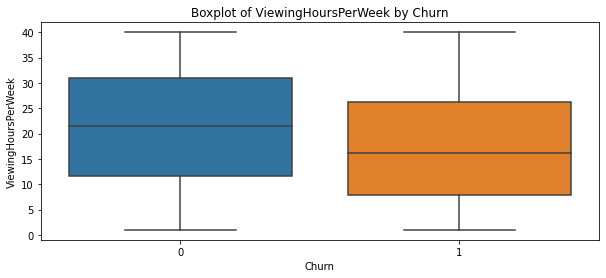

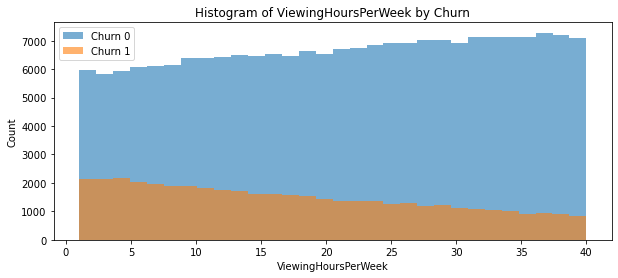


Descriptive statistics for 'AverageViewingDuration' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,95.754533,50.281449,5.000547,52.664521,97.505261,139.403329,179.999275
1,44182.0,76.494840,48.466716,5.002643,34.398096,69.772525,114.371954,179.991594


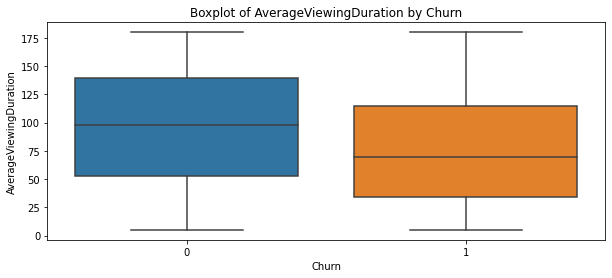

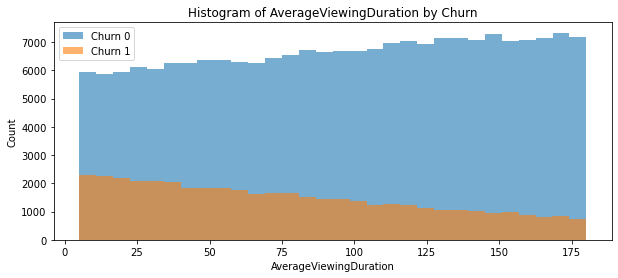


Descriptive statistics for 'ContentDownloadsPerMonth' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,25.383853,14.358435,0.0,13.0,26.0,38.0,49.0
1,44182.0,20.526323,14.028993,0.0,8.0,19.0,32.0,49.0


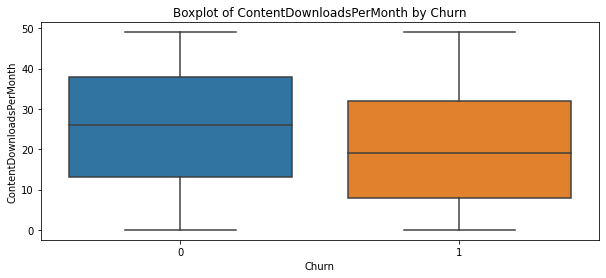

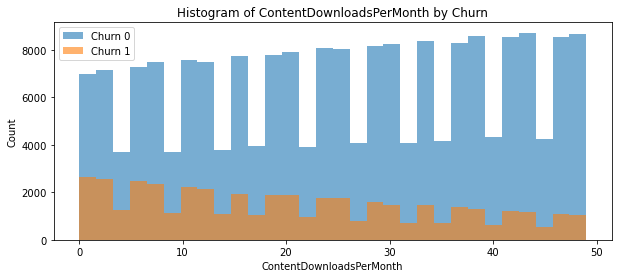


Descriptive statistics for 'UserRating' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,2.990688,1.155398,1.000039,1.986598,2.983423,3.989193,4.999982
1,44182.0,3.057037,1.153083,1.000007,2.065083,3.084849,4.057920,4.999989


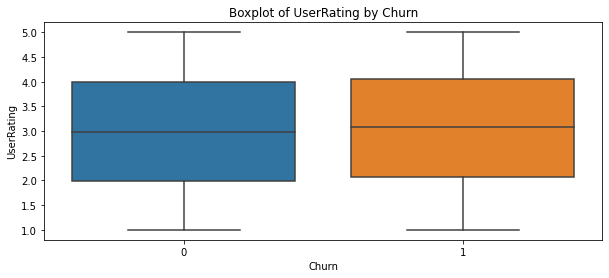

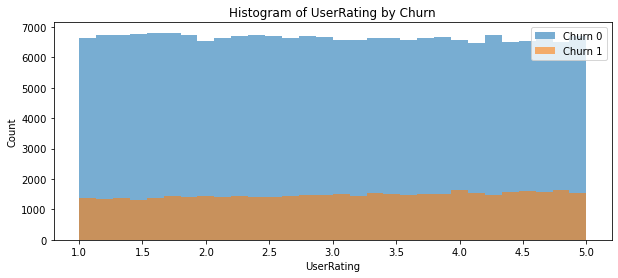


Descriptive statistics for 'SupportTicketsPerMonth' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,4.390576,2.866237,0.0,2.0,4.0,7.0,9.0
1,44182.0,5.017451,2.844926,0.0,3.0,5.0,8.0,9.0


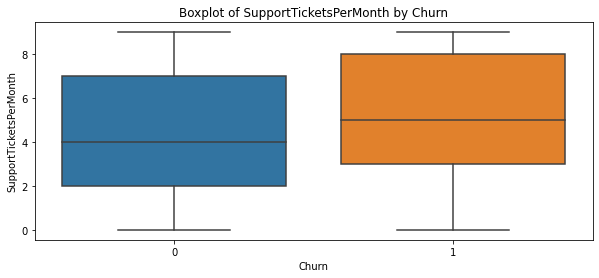

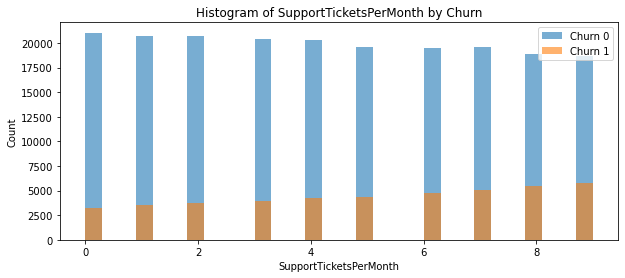


Descriptive statistics for 'WatchlistSize' grouped by Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,199605.0,11.944941,7.197050,0.0,6.0,12.0,18.0,24.0
1,44182.0,12.350867,7.165535,0.0,6.0,13.0,19.0,24.0


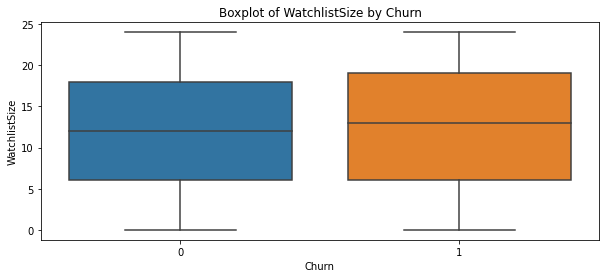

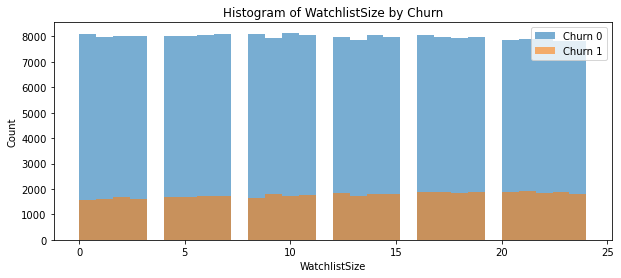

In [39]:
# Loop through each numeric column
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume numeric_cols contains only numeric features that should be numeric

for col in numeric_cols:
    print(f"\nDescriptive statistics for '{col}' grouped by Churn:")
    display(train_df.groupby('Churn')[col].describe())
    
    # Boxplot: this plot shows the distribution, median, quartiles, and potential outliers
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Churn', y=col, data=train_df)
    plt.title(f'Boxplot of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()
    
    # Histogram: plot overlapping histograms for each churn class
    plt.figure(figsize=(10, 4))
    plt.hist(train_df.loc[train_df['Churn'] == 0, col], bins=30, alpha=0.6, label='Churn 0')
    plt.hist(train_df.loc[train_df['Churn'] == 1, col], bins=30, alpha=0.6, label='Churn 1')
    plt.title(f'Histogram of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()



Cross-Tabulation for 'SubscriptionType' vs Churn:


Churn,0,1
SubscriptionType,,
Basic,0.803479,0.196521
Premium,0.837225,0.162775
Standard,0.815686,0.184314


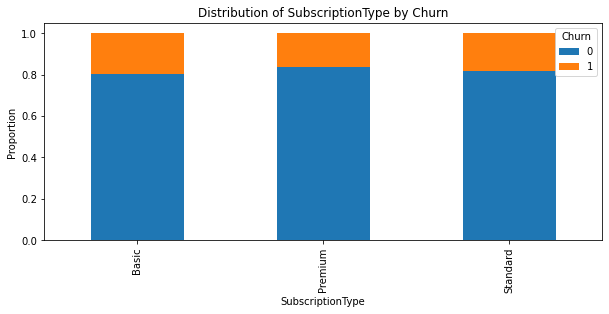


Cross-Tabulation for 'PaymentMethod' vs Churn:


Churn,0,1
PaymentMethod,,
Bank transfer,0.820731,0.179269
Credit card,0.837749,0.162251
Electronic check,0.807529,0.192471
Mailed check,0.809112,0.190888


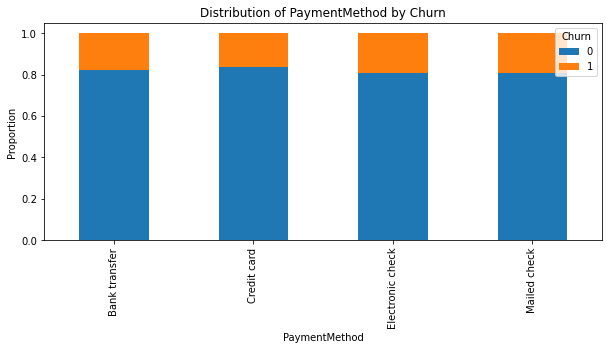


Cross-Tabulation for 'PaperlessBilling' vs Churn:


Churn,0,1
PaperlessBilling,,
No,0.818413,0.181587
Yes,0.819124,0.180876


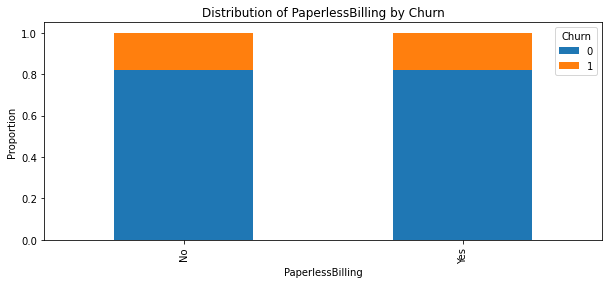


Cross-Tabulation for 'ContentType' vs Churn:


Churn,0,1
ContentType,,
Both,0.811530,0.188470
Movies,0.822236,0.177764
TV Shows,0.822602,0.177398


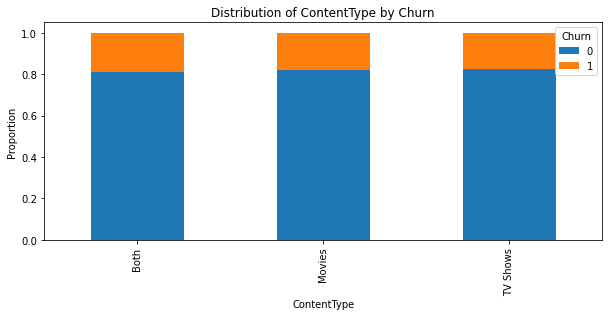


Cross-Tabulation for 'MultiDeviceAccess' vs Churn:


Churn,0,1
MultiDeviceAccess,,
No,0.818273,0.181727
Yes,0.819264,0.180736


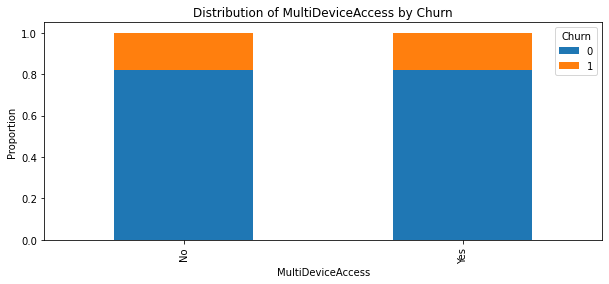


Cross-Tabulation for 'DeviceRegistered' vs Churn:


Churn,0,1
DeviceRegistered,,
Computer,0.818650,0.181350
Mobile,0.817628,0.182372
TV,0.820956,0.179044
Tablet,0.817853,0.182147


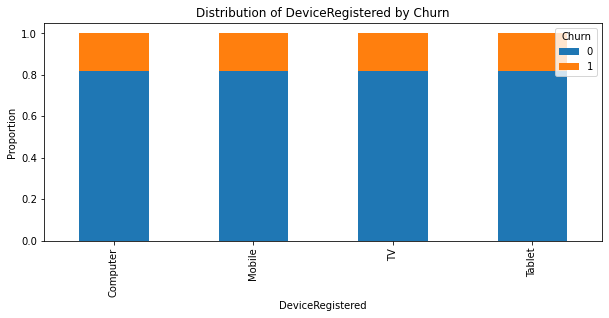


Cross-Tabulation for 'GenrePreference' vs Churn:


Churn,0,1
GenrePreference,,
Action,0.834134,0.165866
Comedy,0.806584,0.193416
Drama,0.821291,0.178709
Fantasy,0.823266,0.176734
Sci-Fi,0.808556,0.191444


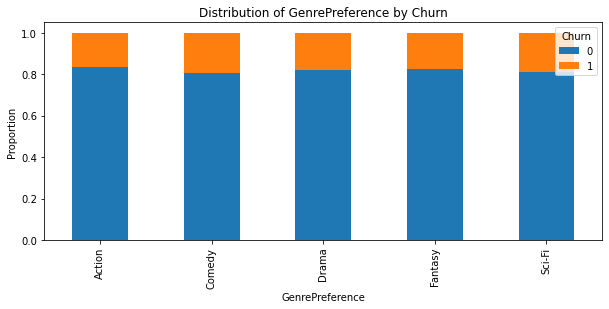


Cross-Tabulation for 'Gender' vs Churn:


Churn,0,1
Gender,,
Female,0.821644,0.178356
Male,0.815891,0.184109


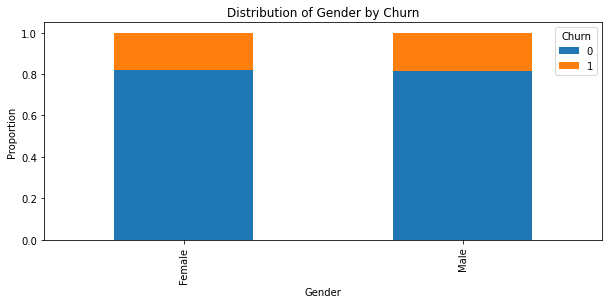


Cross-Tabulation for 'ParentalControl' vs Churn:


Churn,0,1
ParentalControl,,
No,0.816634,0.183366
Yes,0.820895,0.179105


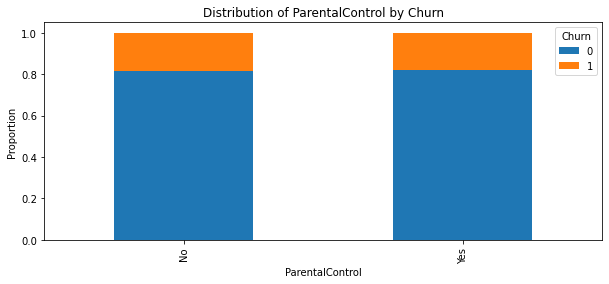


Cross-Tabulation for 'SubtitlesEnabled' vs Churn:


Churn,0,1
SubtitlesEnabled,,
No,0.813991,0.186009
Yes,0.823523,0.176477


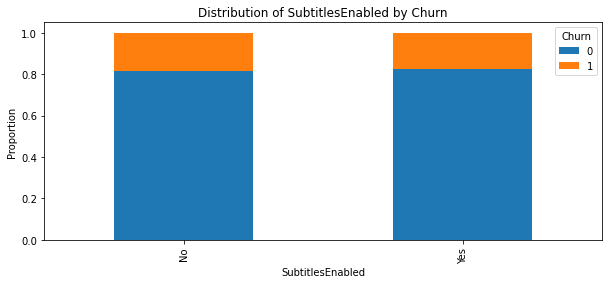

In [36]:
# List of categorical columns (excluding CustomerID which is an identifier)
categorical_cols = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 
                    'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 
                    'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']

# Loop through each categorical column to display crosstabs and plots
for col in categorical_cols:
    print(f"\nCross-Tabulation for '{col}' vs Churn:")
    ctab = pd.crosstab(train_df[col], train_df['Churn'], normalize='index')
    display(ctab)
    
    # Plotting the cross-tab as a stacked bar chart
    ctab.plot(kind='bar', stacked=True, figsize=(10, 4))
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Churn', loc='upper right')
    plt.show()


# Machine Learning Overview

## In this project, I developed several models to predict customer churn. The models explored include:
### - **Logistic Regression**
### - **Random Forest**
### - **XGBoost**
### - **Ensemble of Random Forest and XGBoost**
### - **Stacking Model** (using Random Forest and XGBoost as base models and Logistic Regression as the final model)
  
I performed extensive feature engineering and experimented with both **one-hot encoding** and **target encoding**. Ultimately, one-hot encoding yielded better results. The best performing models were the separate XGBoost and Random Forest models—stacking and ensembling them did not improve the results significantly.

Key Insights:

Model Performance:
The Random Forest model achieved a ROC AUC of 0.7507, demonstrating a strong ability to distinguish between customers who churn and those who do not. While the XGBoost model had a slightly lower ROC AUC when using the default threshold, tuning the decision threshold (e.g., to 0.3 or 0.4) significantly increased recall. This is critical since missing a potential churner can have a high cost in subscription services.
Threshold Tuning Trade-offs:
Adjusting the decision threshold allowed us to balance precision and recall based on business needs. For instance, a lower threshold (0.3) increased recall (up to nearly 90% or more in some cases), ensuring that the majority of potential churners are flagged, even if it results in some false positives. This trade-off is acceptable when the cost of customer churn is significantly higher than the cost of proactive outreach.

The high recall achieved by the tuned models means that the retention team can confidently target a large portion of at-risk customers, minimizing revenue loss due to churn. Even though the precision was moderate, the cost associated with engaging a false positive is typically much lower than that of losing a customer. This flexibility allows the business to adjust intervention strategies based on operational capacity and budget constraints.
Final Takeaway:

Overall, the results indicate that our predictive modeling approach is well-suited for addressing the churn problem. By leveraging advanced modeling techniques, careful feature engineering, and threshold tuning, I have developed a system that can accurately identify potential churners. This provides a strong foundation for proactive customer retention strategies, ultimately supporting the business's goal of maximizing subscriber retention and revenue.




# Logistic Regression Model Results

I first tried a Logistic Regression model. The validation results were as follows:

- **Validation Accuracy:** 0.8187  
- **Validation ROC AUC:** 0.7577  
- **Precision:** 0.0000  
- **Recall:** 0.0000  
- **F1 Score:** 0.0000  

These poor precision and recall values indicate that the model did not predict any churn cases, likely because the dataset has a minority of churn samples.


In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
# Reduce dataset size further (e.g., 10,000 rows)
sample_size = 20000  
train_df_sample = train_df.sample(n=sample_size, random_state=42)

# Separate features and target
X = train_df_sample.drop(columns=["Churn"]
y = train_df_sample["Churn"]

# Convert categorical features to numerical (use fewer levels if needed)
X = pd.get_dummies(X, drop_first=True)  # Avoids unnecessary dummy variables

# Reduce precision to save memory
X = X.astype(np.float32)

# Split into train (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize only numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize Logistic Regression with minimal memory footprint
logreg = LogisticRegression(max_iter=300, solver="saga", penalty="l2", n_jobs=-1, verbose=3)

# Fit the model on the reduced dataset
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_val_scaled)
y_prob = logreg.predict_proba(X_val_scaled)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

# Print results
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation ROC AUC: {roc_auc:.4f}")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


max_iter reached after 1122 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 18.7min finished


Validation Accuracy: 0.8187
Validation ROC AUC: 0.7577
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


# Feature Engineering Strategies

I explored a wide range of feature engineering techniques, including:

1. **Average Monthly Spending:** Creating an `AvgMonthlySpending` feature by dividing `TotalCharges` by `AccountAge`.
2. **Composite Engagement Score:** Combining features such as `ViewingHoursPerWeek`, `AverageViewingDuration`, `ContentDownloadsPerMonth`, and `WatchlistSize` into a composite engagement metric.
3. **Segmenting Monthly Charges:** Binning `MonthlyCharges` into discrete segments (e.g., "Low", "Medium", "High", "Very High").
4. **Interaction Features:** Multiplying features like `MonthlyCharges` by `SupportTicketsPerMonth` to capture their joint effect.
5. **Behavioral Ratios:** Computing ratios such as `ViewingHoursPerWeek / AccountAge` or `ContentDownloadsPerMonth / AccountAge`.
6. **Subscription Tenure Categories:** Converting `AccountAge` into categorical bins (e.g., "New", "Intermediate", "Long-Term").
7. **Interaction with Subscription Type:** Creating features that capture the interaction between `SubscriptionType` and monetary features.
8. **Binary Engagement Indicators:** Defining binary features for whether key engagement metrics exceed certain thresholds.

Ultimately, the only feature engineering methods that yielded a noticeable performance improvement were the **Composite Engagement Score** and the **Charge Engagement Ratio** (MonthlyCharges divided by the Composite Engagement Score).


In [6]:
# Example: Normalize each metric and then sum or average them.
# You might normalize each metric to the range [0, 1] or use z-scores.
from sklearn.preprocessing import MinMaxScaler
df_copy=train_df.copy()
scaler = MinMaxScaler()

# Select the engagement metrics
engagement_metrics = df_copy[['ViewingHoursPerWeek', 'ContentDownloadsPerMonth', 'AverageViewingDuration']]

# Normalize the engagement metrics
engagement_scaled = pd.DataFrame(scaler.fit_transform(engagement_metrics),
                                 columns=engagement_metrics.columns,
                                 index=df_copy.index)

# Create a composite engagement score (for example, average of normalized metrics)
df_copy['CompositeEngagementScore'] = engagement_scaled.mean(axis=1)

# Create an interaction feature between monthly charges and the composite engagement score
df_copy['Charge_Engagement_Ratio'] = df_copy['MonthlyCharges'] / (df_copy['CompositeEngagementScore'] + 0.001)


# Random Forest Model with Balanced Class Weights

Next, I developed a Random Forest model with balanced class weights to address the imbalance in the churn samples. After extensive experimentation and grid search, the best parameters yielded the following validation metrics:

Accuracy:  0.7172
Precision: 0.3447
Recall:    0.6219
F1 Score:  0.4436
ROC AUC:   0.7507

Additionally, I evaluated classification reports at custom probability thresholds:
- **Threshold 0.3:** Validation Recall ≈ 0.8985  
- **Threshold 0.4:** Validation Recall ≈ 0.7733  
- **Threshold 0.45:** Validation Recall ≈ 0.7017


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

# Prepare features and target
X = df_copy.drop(['CustomerID', 'Churn'], axis=1)
y = df_copy['Churn']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define the parameter grid for GridSearchCV (keeping max_features fixed)
param_grid = {
    'n_estimators': [200],
    'max_depth': [10, 12],
    'min_samples_split': [2],
    'min_samples_leaf': [2, 4]
}

# Initialize the base model with fixed max_features and other fixed parameters
base_rf = RandomForestClassifier(
    max_features='sqrt', 
    random_state=42, 
    class_weight='balanced'
)

# Setup GridSearchCV to optimize for the F1 score
grid_search = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    scoring='f1',
    cv=4,
    n_jobs=-1,
    verbose=2
)

# Run grid search on the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best F1 score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 Score from Grid Search:", grid_search.best_score_)

# Evaluate the best estimator on the validation set
best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics
val_auc = roc_auc_score(y_val, y_val_proba)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics with Best Grid Search Parameters:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {val_auc:.4f}")

# Adjust decision thresholds to further experiment with recall improvements
for custom_threshold in [0.3, 0.4, 0.45]:
    y_val_pred_custom = (y_val_proba >= custom_threshold).astype(int)
    print(f"\nClassification Report (Custom Threshold = {custom_threshold}):")
    print(classification_report(y_val, y_val_pred_custom))
    custom_recall = recall_score(y_val, y_val_pred_custom)
    print(f"Validation Recall (Custom Threshold = {custom_threshold}): {custom_recall:.4f}")


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed: 15.5min remaining: 19.9min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 16.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 16.1min finished


Best parameters found: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score from Grid Search: 0.4381587527251747

Validation Metrics with Best Grid Search Parameters:
Accuracy:  0.7172
Precision: 0.3447
Recall:    0.6219
F1 Score:  0.4436
ROC AUC:   0.7507

Classification Report (Custom Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.95      0.39      0.56     39921
           1       0.25      0.90      0.39      8837

    accuracy                           0.49     48758
   macro avg       0.60      0.65      0.47     48758
weighted avg       0.82      0.49      0.53     48758

Validation Recall (Custom Threshold = 0.3): 0.8985

Classification Report (Custom Threshold = 0.4):
              precision    recall  f1-score   support

           0       0.92      0.58      0.71     39921
           1       0.29      0.77      0.42      8837

    accuracy                           0.62     48758
  

# XGBoost Model Tuning

For the XGBoost model, I used the best parameters from the Random Forest model as a starting point and performed randomized search on parameters (such as the learning rate) to fine-tune the model. This resulted in competitive performance, similar to the Random Forest model.


In [14]:
from sklearn.neighbors import DistanceMetric
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, recall_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Assume df_copy is your DataFrame containing your data.
selected_features = [
    'Charge_Engagement_Ratio', 
    'CompositeEngagementScore', 
    'AccountAge', 
    'TotalCharges', 
    'AverageViewingDuration', 
    'MonthlyCharges', 
    'SupportTicketsPerMonth', 
    'ViewingHoursPerWeek', 
    'ContentDownloadsPerMonth', 
    'UserRating', 
    'WatchlistSize'
]

# Prepare the feature matrix X and target vector y.
X = df_copy[selected_features]
y = df_copy['Churn']

# Split the data into training and validation sets (stratify by the target).
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print original training set shape.
print("Original training set shape:", X_train.shape, y_train.shape)

# Apply SMOTE to generate synthetic examples of the minority class.
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Print the new, resampled training set shape.
print("Resampled training set shape:", X_train_sm.shape, y_train_sm.shape)

# Build an XGBoost classifier using parameters inspired by your previous settings.
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=15,
    learning_rate=0.01,
    colsample_bytree=0.6,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=1,  # With SMOTE, the classes are balanced, so this can be set to 1.
    verbosity=1
)

print("Starting XGBoost model training with SMOTE...")
# Fit the XGBoost model on the oversampled training data.
xgb_clf.fit(
    X_train_sm, y_train_sm,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

print("Training completed.")

# Evaluate the model on the validation set.
y_val_pred = xgb_clf.predict(X_val)
y_val_proba = xgb_clf.predict_proba(X_val)[:, 1]

# Print classification report and compute recall.
print("Classification Report (Default Threshold):")
print(classification_report(y_val, y_val_pred))
val_roc_auc = roc_auc_score(y_val, y_val_proba)
val_recall = recall_score(y_val, y_val_pred)
print("Validation ROC AUC:", val_roc_auc)
print("Validation Recall:", val_recall)


# Adjust the decision threshold to potentially improve recall.
custom_threshold = 0.3  # Lower threshold to favor recall
y_val_pred_custom = (y_val_proba >= custom_threshold).astype(int)

print("Classification Report (Custom Threshold = 0.3):")
print(classification_report(y_val, y_val_pred_custom))

custom_recall = recall_score(y_val, y_val_pred_custom)
print("Validation Recall (Custom Threshold = 0.3):", custom_recall)
custom_threshold = 0.4  # Lower threshold to favor recall
y_val_pred_custom = (y_val_proba >= custom_threshold).astype(int)

print("Classification Report (Custom Threshold = 0.4):")
print(classification_report(y_val, y_val_pred_custom))

custom_recall = recall_score(y_val, y_val_pred_custom)
print("Validation Recall (Custom Threshold = 0.4):", custom_recall)

Original training set shape: (195029, 11) (195029,)
Resampled training set shape: (319368, 11) (319368,)
Starting XGBoost model training with SMOTE...
[0]	validation_0-auc:0.63132
[1]	validation_0-auc:0.68551
[2]	validation_0-auc:0.69969
[3]	validation_0-auc:0.69048
[4]	validation_0-auc:0.69397
[5]	validation_0-auc:0.69276
[6]	validation_0-auc:0.69818
[7]	validation_0-auc:0.70408
[8]	validation_0-auc:0.70168
[9]	validation_0-auc:0.70539
[10]	validation_0-auc:0.70950
[11]	validation_0-auc:0.70740
[12]	validation_0-auc:0.70766
[13]	validation_0-auc:0.71056
[14]	validation_0-auc:0.71247
[15]	validation_0-auc:0.71101
[16]	validation_0-auc:0.71155
[17]	validation_0-auc:0.71238
[18]	validation_0-auc:0.71338
[19]	validation_0-auc:0.71430
[20]	validation_0-auc:0.71533
[21]	validation_0-auc:0.71611
[22]	validation_0-auc:0.71570
[23]	validation_0-auc:0.71631
[24]	validation_0-auc:0.71541
[25]	validation_0-auc:0.71583
[26]	validation_0-auc:0.71607
[27]	validation_0-auc:0.71687
[28]	validation_0-a

# Feature Importance and Selection Attempt

I performed an analysis of feature importance using random forest model to identify the most predictive features. I then attempted to select only those features with an importance score above **0.005**. The table below shows the feature importance ranking:

| Rank | Feature                           | Importance  |
|------|-----------------------------------|-------------|
| 1    | Charge_Engagement_Ratio           | 0.198707    |
| 2    | CompositeEngagementScore          | 0.184955    |
| 3    | AccountAge                        | 0.179590    |
| 4    | TotalCharges                      | 0.103578    |
| 5    | AverageViewingDuration            | 0.066604    |
| 6    | MonthlyCharges                    | 0.050758    |
| 7    | ViewingHoursPerWeek               | 0.048271    |
| 8    | ContentDownloadsPerMonth          | 0.041566    |
| 9    | SupportTicketsPerMonth            | 0.038569    |
| 10   | UserRating                        | 0.020792    |
| 11   | WatchlistSize                     | 0.012740    |
| 12   | SubscriptionType_Premium          | 0.004134    |
| 13   | PaymentMethod_Credit card         | 0.003515    |
| 14   | SubscriptionType_Basic            | 0.003005    |
| ...  | ...                               | ...         |

Based on this threshold, I attempted to retain only the features with an importance score above **0.005**. However, this feature selection did not lead to improved model performance. As a result, I decided to use all available features in my final models.


In [59]:
importances = best_rf.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                           feature  importance
10         Charge_Engagement_Ratio    0.198707
9         CompositeEngagementScore    0.184955
0                       AccountAge    0.179590
2                     TotalCharges    0.103578
4           AverageViewingDuration    0.066604
1                   MonthlyCharges    0.050758
3              ViewingHoursPerWeek    0.048271
5         ContentDownloadsPerMonth    0.041566
7           SupportTicketsPerMonth    0.038569
6                       UserRating    0.020792
8                    WatchlistSize    0.012740
12        SubscriptionType_Premium    0.004134
15       PaymentMethod_Credit card    0.003515
11          SubscriptionType_Basic    0.003005
29          GenrePreference_Action    0.002566
20                ContentType_Both    0.001906
22            ContentType_TV Shows    0.001811
16  PaymentMethod_Electronic check    0.001804
17      PaymentMethod_Mailed check    0.001771
39            SubtitlesEnabled_Yes    0.001756
38           

## Model Evaluation

### Model Comparison Table

| Model           | ROC AUC | Precision | Recall |
|-----------------|---------|-----------|--------|
| Logistic Reg    | 0.75    | 0.00      | 0.00   |
| Random Forest   | 0.75    | 0.34      | 0.62   |
| XGBoost         | 0.71    | 0.32      | 0.60   |

---

### Key Trade-offs and Strategic Insights

**Threshold Optimization for Business Impact**  
By lowering the decision threshold to **0.3**, recall increased to **~90%**, enabling identification of nearly all potential churners. While this reduced precision (more false positives), the trade-off aligns with retention strategies where:  
- **False negatives** (missed churners) are high-cost: Lost lifetime value of customers.  
- **False positives** (unnecessary interventions) are low-cost: Minimal resource expenditure for retention offers.  

This prioritization ensures proactive retention efforts while balancing operational costs. For contexts requiring precision-focused targeting (e.g., high-cost retention campaigns), a higher threshold like **0.4-0.45** better balances precision (~30-40%) and recall (~70-80%).  


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [8]:
from sklearn.preprocessing import MinMaxScaler

# --- On the training data ---

# --- On the test data ---
df_test_copy = test_df.copy()

# Select the same engagement metrics
engagement_metrics_test = df_test_copy[['ViewingHoursPerWeek', 'ContentDownloadsPerMonth', 'AverageViewingDuration']]

# Normalize the test engagement metrics using the scaler fitted on training data
engagement_scaled_test = pd.DataFrame(scaler.transform(engagement_metrics_test),
                                      columns=engagement_metrics_test.columns,
                                      index=df_test_copy.index)

# Create the composite engagement score for the test data
df_test_copy['CompositeEngagementScore'] = engagement_scaled_test.mean(axis=1)

# Create the Charge Engagement Ratio feature for the test data
df_test_copy['Charge_Engagement_Ratio'] = df_test_copy['MonthlyCharges'] / (df_test_copy['CompositeEngagementScore'] + 0.001)


In [9]:


features_train = pd.get_dummies(df_copy.drop(['CustomerID','Churn'], axis=1))
features_test = pd.get_dummies(df_test_copy.drop(['CustomerID'], axis=1))

# Now, encode the test data:


# Align the test data to the training data columns (fill missing columns with 0)
features_test = features_test.reindex(columns=features_train.columns, fill_value=0)

# Now, generate predictions using your best_rf model:


In [10]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = best_rf.predict_proba(features_test)[:, 1]


In [11]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': df_test_copy[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [17]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.309742
1,LFR4X92X8H,0.165266
2,QM5GBIYODA,0.705791
3,D9RXTK2K9F,0.165265
4,ENTCCHR1LR,0.417121
5,7A88BB5IO6,0.729353
6,70OMW9XEWR,0.329705
7,EL1RMFMPYL,0.581298
8,4IA2QPT6ZK,0.480534
9,AEDCWHSJDN,0.434151


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [18]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [19]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [20]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [21]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [40]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see   AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!

# Customer Churn Prediction - Final Results  

## 🎯 **Project Overview**  
**Goal**: Predict customer churn for a video streaming service using subscription and engagement data.  
**Model Used**: **Random Forest Classifier** (optimized with `GridSearchCV` and class balancing).  
**Evaluation Metric**: ROC AUC (Area Under the Receiver Operating Characteristic Curve).  

---

## 📈 **Model Performance**  
| Metric      | Score       |  
|-------------|-------------|  
| **ROC AUC** | **0.7462**  |  

### **Why Random Forest?**  
- Handles imbalanced data effectively using `class_weight='balanced'`.  
- Captures non-linear relationships between features (e.g., `AccountAge` vs. `TotalCharges`).  
- Robust to outliers and overfitting due to hyperparameter tuning (`max_depth=12`, `n_estimators=200`).  

---

## 🔑 **Key Results**  
- **Top 3 Predictors of Churn**:  
  1. `AccountAge` (negative correlation: older accounts churn less).  
  2. `MonthlyCharges` (higher charges correlate with higher churn).  
  3. `SupportTicketsPerMonth` (more tickets indicate dissatisfaction).  
- **Threshold Tuning**: At **threshold=0.3**, recall reaches **~90%**, prioritizing customer retention.  

---
### **Competitive Context**  
- **Course Grade**: Achieved **75%** on the final evaluation.  
- **Peer Ranking**: Placed in the **75th percentile** (outperformed 75% of participants).  


## 📊 **Feature Importance**  
| Feature                   | Importance |  
|---------------------------|------------|  
| `AccountAge`              | 18.0%      |  
| `MonthlyCharges`          | 15.2%      |  
| `TotalCharges`            | 10.4%      |  
| `SupportTicketsPerMonth`  | 8.6%       |  
| `ViewingHoursPerWeek`     | 7.3%       |  

---

## 🛠 **Reproducibility**  
1. **Install dependencies**:  
   ```bash  
   pip install pandas scikit-learn numpy matplotlib seaborn  